# CHME0031: Software Development with Python for Health Data SCIENCE – Coursework 2021-22

##### MODULE REQUIREMENTS:
- Python 3.0
- Pandas
- Matplotlib
- Seaborn
- Numpy

In [1]:
#!--importing essential libraries--!

import pandas as pd                                                 #useful for Data Manipulation
import seaborn as sns                                               #useful for Data Visualization
import matplotlib.pyplot as plt                                     #using for Data Visualization
%matplotlib inline                                                  
import numpy as np                                                  #for fast calculation
import re

#####  GOAL: 
> As an NHS Data Scientist the motive is to review, document, and assess dental practices in London, with a focus on the impact of the COVID-19 pandemic.
##### Data: 
> Using open-source NHS data from
- Public Health England, covering test capacity and case numbers and,
- Data from dental practices
spanning from January 2020 to the end of June 2021.

# Task A [35 marks] – Public Health England – COVID-19 data

>- Dataset:
Public Health England has collected the coronavirus pandemic progress and timely updates the information. The dataset consists of New covid cases admitted to hospitals, cases reported, vaccination records, and the number of people who tested positive which is marked with suitable dates.

### Q1. Load in the data and give a general description of the dataset, date-range, total number of observations and the number of missing data per variable [10 marks]
***


#### Approach:

We will initiate with loading our dataset `nation_2021-12-13.csv` which is available in folder named `Datasets-20211228`. Futher, we will be applying preprocessing steps like handling missing data values and formatting datasets suitable for on going steps.
> After data cleaning, we intend to repond to the general questions about the datasets and missing values.

In [2]:
pd.set_option("display.max.columns", None)                          # displays all columns in output (not like ...)
pd.set_option("display.precision", 2)                               # by default it 6 decimal places but we have changed to 2 

In [3]:
covid_data = pd.read_csv("Datasets-20211228/nation_2021-12-13.csv") #Loading data

>- Using `.shape` and `.columns`

In [4]:
covid_data.shape                                                  # We have 683 rows and 8 columns

(683, 8)

In [5]:
covid_data.columns                                                #Printing the column names

Index(['areaCode', 'areaName', 'areaType', 'date', 'newAdmissions',
       'newCasesByPublishDate', 'newPeopleVaccinatedSecondDoseByPublishDate',
       'newTestsByPublishDate'],
      dtype='object')

>- Using `.describe()`

In [6]:
covid_data.describe()                                             #using .describe()

,newAdmissions,newCasesByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,newTestsByPublishDate
count,633.00,683.00,336.00,5.18e+02
mean,820.97,13547.24,115650.02,6.06e+05
std,825.26,14398.78,120832.33,3.52e+05
min,25.00,0.00,0.00,7.43e+04
25%,188.00,1349.50,20274.50,2.59e+05
50%,648.00,5632.00,74276.00,6.19e+05
75%,1055.00,24848.00,165817.00,8.79e+05
max,4134.00,61757.00,508013.00,1.85e+06


In [7]:
covid_data.describe(include = ['object'])                                   #object − Summarizes String columns
                                                                            #number − Summarizes Numeric columns

,areaCode,areaName,areaType,date
count,683,683,683,683
unique,1,1,1,683
top,E92000001,England,nation,2021-02-20
freq,683,683,683,1


In [8]:
covid_data.head(2)                                                          #Getting the look of data

,areaCode,areaName,areaType,date,newAdmissions,newCasesByPublishDate,newPeopleVaccinatedSecondDoseByPublishDate,newTestsByPublishDate
0,E92000001,England,nation,2021-12-13,NaN,44931,NaN,NaN
1,E92000001,England,nation,2021-12-12,NaN,40713,24900.0,1.14e+06


#### 1a) Dataset Description:
> - The data consist of 683 rows and 8 columns.
- The 8 columns are named as follows: 'areaCode', 'areaName', 'areaType', 'date', 'newAdmissions', 'newCasesByPublishDate', 'newPeopleVaccinatedSecondDoseByPublishDate', 'newTestsByPublishDate'.
- A basic statistical description like mean, count, standard deviation, the frequency for columns can be found about in `.describe()` section.
- `newAdmissions, newCasesByPublishDate, newPeopleVaccinatedSecondDoseByPublishDate, newTestsByPublishDate` fields have a numeric data type whereas `areaCode, areaName, areaType` are Object types. Later, we will change the `date` field to datetime data type to ease data manipulation.

#### 1b) MIssing data per variable:
> Using `.isna()` function to find the null values and trying to visualize the missing data using the seaborn library. I chose `Heatmap`since it represents the individual values in form of a matrix which in our scenario matches the DataFrame with missing data. It is also adequate to show volume(indices) within the dataset.

In [9]:
covid_data.isna().sum()                                #counting null values

areaCode                                        0
areaName                                        0
areaType                                        0
date                                            0
newAdmissions                                  50
newCasesByPublishDate                           0
newPeopleVaccinatedSecondDoseByPublishDate    347
newTestsByPublishDate                         165
dtype: int64

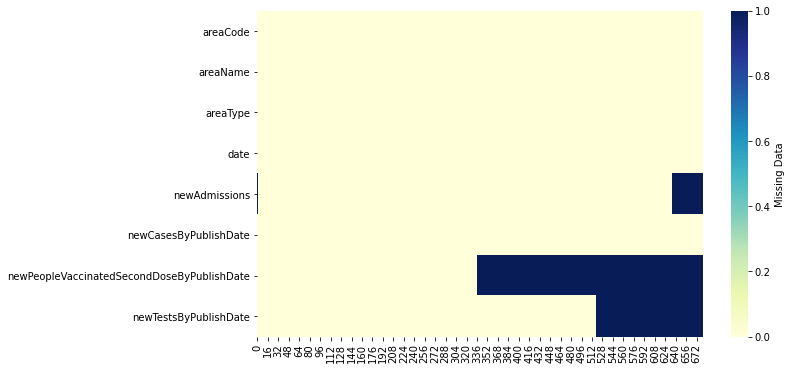

In [10]:
#Used Seaborn Heatmaps to get the look of data along with the position of missing data with corresponding indices per variable
plt.figure(figsize=(10,6))
sns.heatmap(covid_data.isna().transpose(),              
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

- <b>Cleaning Data: </b>
>We will use `.info()` function to get the insight of null values and if we can drop the unnecessary fields.
```Python
     df.info()
``` 

In [11]:
# We are using Missing values
covid_data.info(), covid_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   areaCode                                    683 non-null    object 
 1   areaName                                    683 non-null    object 
 2   areaType                                    683 non-null    object 
 3   date                                        683 non-null    object 
 4   newAdmissions                               633 non-null    float64
 5   newCasesByPublishDate                       683 non-null    int64  
 6   newPeopleVaccinatedSecondDoseByPublishDate  336 non-null    float64
 7   newTestsByPublishDate                       518 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 42.8+ KB


(None, (683, 8))

#### Discussion: 
>As seen with `.info()`, `newPeopleVaccinatedSecondDoseByPublishDate` contains almost half of the information, so we might have to think about handling these values. In my opinion, it would be fine to consider these missing values as the population that has not received 2nd dose vaccination. Dropping the columns would not make meaning as we demand this field for plotting and to picture the trend, hence it is acceptable to `believe null values as people who are not vaccinated`.

#### 1c)- Total Number of Observation = `683`

In [12]:
covi = covid_data.copy()
covi['date'] = pd.to_datetime(covid_data['date'])   #Change to datetime format to ease the pandas calculation

In [13]:
covi.describe(include = ['datetime'])   #Since it was not described before and we can also see top and last dates

,date
count,683
unique,683
top,2020-08-26 00:00:00
freq,1
first,2020-01-31 00:00:00
last,2021-12-13 00:00:00


#### 1d) Date-Range:
> Stating the range for date using `.min()` and `.max()` functions. 
- Date-range = `2020-01-31` to `2021-12-13`

In [14]:
covi['date'].min(), covi['date'].max()                      # getting timestamps

(Timestamp('2020-01-31 00:00:00'), Timestamp('2021-12-13 00:00:00'))

### Q2. Create a plot for the timeline that shows all four variables and discuss the findings [10 marks]
---

#### Approach:

> The vision was to observe the covid trend by days using a time-series plot. To get a more reasonable representation of 4 variables i.e., `newAdmissions, newCasesByPublishDate, newPeopleVaccinatedSecondDoseByPublishDate, newTestsByPublishDate`, I decided to design an integrated graph (to locate major differences) and subplots for the small value variables like `newAdmissions, newCasesByPublishDate` since the quantum were in different scales.

> I did not include `newPeopleVaccinatedSecondDoseByPublishDate` in subplots because it did not align with the other variables as 2nd dose vaccination initiated later (around April 2021), although the main graph delivers an exemplary pattern for it.

In [15]:
covid_data['date'] = pd.to_datetime(covid_data['date']) #coverting to pandas datetime format

Text(0.5, 0, 'Dates')

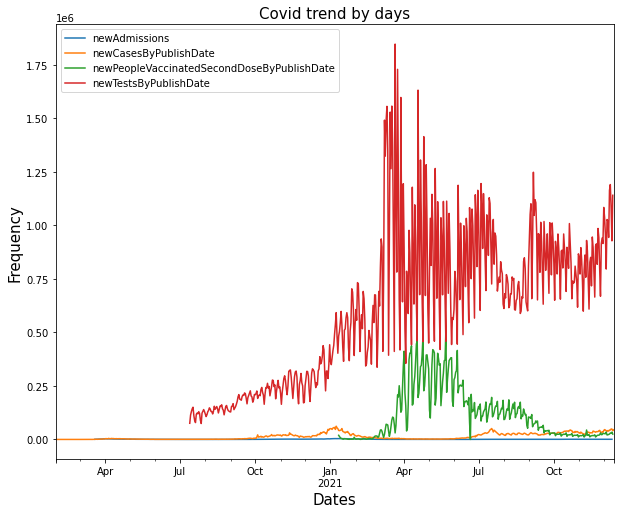

In [16]:
#plotting the graph for all 4 variabes
fig_au = covid_data.plot(x='date', figsize=(10,8))       #create bigger plot
fig_au.set_title('Covid trend by days',fontsize=15)      #labeling the graph
fig_au.set_ylabel('Frequency',fontsize=15)
fig_au.set_xlabel('Dates',fontsize=15)

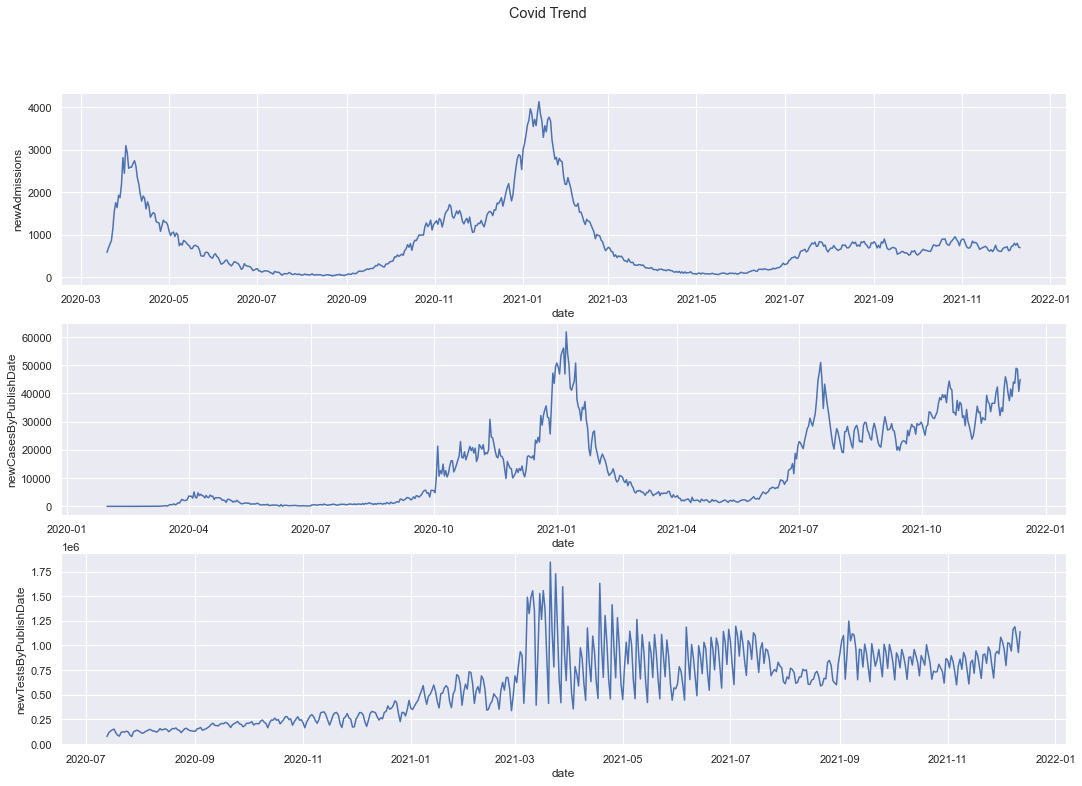

In [57]:
#plotting subplots for 3 variables
fig, axes = plt.subplots(3, 1, figsize=(18,12))   #produce bigger image

fig.suptitle('Covid Trend')

sns.lineplot(ax=axes[0], x=covid_data.date, y=covid_data.newAdmissions)
sns.lineplot(ax=axes[1], x=covid_data.date, y=covid_data.newCasesByPublishDate)
# sns.lineplot(ax=axes[2],  x=covid_data.date, y=covid_data.newPeopleVaccinatedSecondDoseByPublishDate)
sns.lineplot(ax=axes[2], data=covid_data, x='date', y='newTestsByPublishDate')  #using a little different syntax
 

#### Observations Noted: Discussing the graph
We witness that the newAdmissions and NewCasesByPublishDat variables are related because new covid cases registered mark an increase of admits in hospitals. Also, newTestsByPublishDate and newCasesByPublishDate had the same overall pattern till the vaccination discovery which lead to a dropping down of cases. The major acceleration is noted from October 2020 until the new year's, which was the 2nd covid wave observed in the UK.

Since I was not in the UK in 2020, I attempted to correlate the charts with the timeline of the UK government lockdown and reports to get relatable insights. I discovered one resource online which I have shared in the next cell.

> <b>2020</b>
- *Quarter I:* Covid-19 cases started rising therefore many `newAdmissions` were reported. Plus, lockdown started in March end.
- Quarter II: Government announces that England/UK passed the peak and this can also be observed in `newCasesByPublishedDate`.
- Quarter III: Relaxing in restrictions and cases are in control as observed in `newAdmissions and newCasesByPublishedDate`. During September, we start getting admits to the hospitals and an increase in new cases can be detected in October. 
- Quarter IV: In October, the cases start rising and the government announces 2nd lockdown (31st Cct).

> <b>2021 </b>
- Quarter I: During Christmas, some relaxation was granted and we can observe a high increase in cases and admits after New Year. However, the condition gets better in February and they lift the lockdown in Feb end.
- Quarter II: It is interesting to observe that `newTestByPublishDate` has a quite high value in this quarter and the cases are not much. It would be suitable to state that people were concerned about their health and began taking precautions. This is the major time when people got their `second dose of vaccine` thus it is appropriate to say that after vaccination cases started to decrease and though the `newTestsByPublishDate` was high in number, no new cases `newCasesByPublishedDate` and admits `newAdmissions` were observed.
- Quarter III: Cases `newCasesByPublishedDate` start to rise again around August and september. It might have occurred since that was September intake and lot many students traveled to the country. 
- Quarter IV: In November and December cases start to accelerate and the digits are still high.

In [18]:
from IPython.display import Image
#PLease double click to see the details in image or follow the link
Image(url= "https://www.instituteforgovernment.org.uk/sites/default/files/chart-images/timeline-coronavirus-lockdown-december-2021_0.png")

### 3. Create a function that takes a date and an area code as inputs and (a) creates the corresponding URL to link to these data, (b) retrieves and loads the data into a pandas dataframe and (c) plots a figure showing the minimum and maximum transmission rates over time (R value). Make sure that your function can handle errors if a wrong URL string is provided. To test your function, run the code with the North West code “E40000010” using the historic data released on the 26th of February 2021. Compare this to a plot for the South East, using the same date and discuss your findings [15 marks].
---

#### Approach:
> The objective is to retrieve the dataset using NHS API where we will be calling the API based on the area and dates. Some validation checks would be there so that we can handle faulty URL and API calls. Transmission rates in the dataset define the R values and it is a useful estimate to measure the spread of coronavirus over the period. Therefore, we will be plotting the minimum and maximum transmission rates by date to see the average number of infections per day.

> One of the engaging tasks is to compare the infection spread on the same date but in a different area. We will be visualizing the variables and approximating the increase or decrease concerning the time.


In [19]:
url = 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nhsRegion&areaCode=E40000005&metric=transmissionRateMax&metric=transmissionRateMin&format=csv&release=2021-02-26'

In [20]:
read = pd.read_csv(url)
read['date'] = pd.to_datetime(read['date']).dt.strftime('%Y-%m-%d')     #opting suitable datetime format
read = read.sort_values(by = ['date'])
read.tail()

,areaCode,areaName,areaType,date,transmissionRateMax,transmissionRateMin
4,E40000005,South East,nhsRegion,2021-01-29,0.9,0.7
3,E40000005,South East,nhsRegion,2021-02-05,0.9,0.6
2,E40000005,South East,nhsRegion,2021-02-12,0.8,0.7
1,E40000005,South East,nhsRegion,2021-02-19,0.8,0.6
0,E40000005,South East,nhsRegion,2021-02-26,0.9,0.7


In [21]:
def getdatacsv(date, areacode):
    #part (a)
    regex1 = '^\d{4}\-(0?[1-9]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$'
    regex2 = '^(E400000)(0[1-9]|10)'
    if re.match(regex1, date) and re.match(regex2, areacode):
    
        url = ('https://api.coronavirus.data.gov.uk/v2/data?areaType=nhsRegion&areaCode=' + 
            areacode + 
            '&metric=transmissionRateMax&metric=transmissionRateMin&format=csv&release=' + 
            date)
        #adding error handling with regex
        #part (b)
        transmissionplot = pd.read_csv(url)
        transmissionplot['date'] = pd.to_datetime(read['date']).dt.strftime('%Y-%m-%d')
        transmissionplot = transmissionplot.sort_values(by = ['date'])
        #part (c)
        fig_au = transmissionplot.plot(x='date', figsize=(15,5))
        fig_au.set_title('Covid Transmission Rate',fontsize=15)
        fig_au.set_ylabel('Frequency',fontsize=15)
        fig_au.set_xlabel('Date',fontsize=15)
        print(transmissionplot.transmissionRateMax.max(), transmissionplot.transmissionRateMax.min())
        print(transmissionplot.transmissionRateMin.max(), transmissionplot.transmissionRateMin.min())

    elif not re.match(regex1, date):
        return 'Check date format!'
    else:
        return 'Check areacode please!'

In [22]:
getdatacsv('2021-02-26' ,'E4000010'), getdatacsv('2021/02/26' ,'E40000005')   #Error handling 
# Northwest and southeast

('Check areacode please!', 'Check date format!')

#### Nothwest Region infomation until 26th Feb 2021

1.5 0.9
1.3 0.6


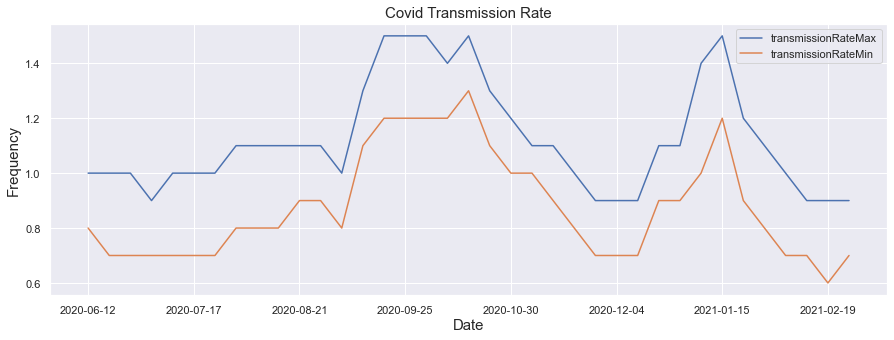

In [58]:
getdatacsv('2021-02-26' ,'E40000010')              #Calling getdatacsv function

#### South-Eastern Region until 26th Feb 2021

1.5 0.8
1.3 0.6


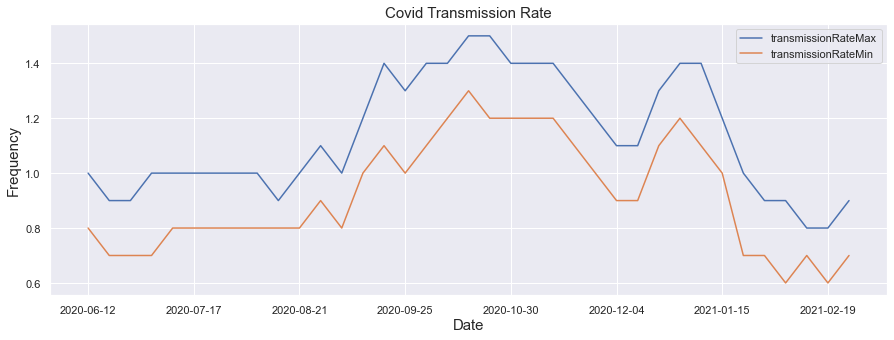

In [59]:
getdatacsv('2021-02-26' ,'E40000005')

### Comparison:

>- We can start with first discussing the normal facts about R values. The range of R values is as maximum as 1.5 and minimum as 0.6, where transmission rate = 1 means one infected person infected one more person. Talking in terms of covid, if we want pandemic to over then this rate must be equal to 0 which we cannot notice here. The lowest value we hold is 0.6 which means the pandemic would shrink but it is still a long way to get over. Besides, I assumed TransmissionRateMax and TransmissionRateMin are to illustrate the range of the transmission.

>- Taking about the graph, it is noted that there was a steep decline and incline for North-West region in 4th Quarter (2020) whereas in South-East region not a major reduction in transmission rates was observed. Although, in the 1st Quarter(2021) both had reached the high R values. In broad-spectrum, patterns of both graphs remain the same.

> - It is seeable that the infection was at its peak during October 2020 due to which the 2nd lockdown was initiated by the PM (we examined this above). It is fitting to say that the high transmission rate is associated with `new cases and new admissions` in the hospital. After the lockdown, it can be seen that the transmission rate came down to some extent but it started increasing after mid-December which can be justified by the fact that it was Christmas and there was some ease in covid lockdown. Thereafter, the transmission is spotted to dip after the Christmas and New Year's celebrations.

***
---
___
---

# Task B [65 marks] – Dental data in England

In this part we are supposed to evaluate the usage of dental practices in England. We will be using `June 2020 to June 2021` data from `NHS Digital` for this purpose. The dataset reports the number of patients seen during the stated period of time.

#### Dataset Description:
>The dataset contains the dental record from June 2020 to June 2021 which has been subdivided into 3 CSV files. The date has been mentioned in terms of quarters i.e., January to March, April to June, July to September and October to December and can be noticed using `PSEEN_END_DATE` - defining that end of Quarter.

In [25]:
# Loading data for January to June 2021 end
jan_jun2021 = pd.read_csv('Datasets-20211228/nhs-dent-stat-eng-jan-jun-21-anx3-ps-prac.csv')
jan_jun2021.tail(2)

,PSEEN_END_DATE,GEOG_TYPE,PRACTICE_CODE,PRACTICE_NAME,PRAC_POSTCODE,CCG_CODE,CCG_ONS_CODE,CCG_NAME,LA_CODE,LA_NAME,REGION_CODE,REGION_ONS_CODE,REGION_NAME,PATIENT_TYPE,AGE_BAND,PATIENTS_SEEN,POPULATION
920572,2021-06-30,Practice,V98262,McCormick and Harrington Ltd,TS23 2LU,16C,E38000247,NHS Tees Valley CCG,E06000004,Stockton-on-Tees Borough Council,Y63,E40000009,North East and Yorkshire,Adult,85+,97,NaN
920573,2021-06-30,Practice,V98262,McCormick and Harrington Ltd,TS23 2LU,16C,E38000247,NHS Tees Valley CCG,E06000004,Stockton-on-Tees Borough Council,Y63,E40000009,North East and Yorkshire,Child,9,43,NaN


- <b>Pre-processing and Data Cleaning:</b>
Using `.info()` to check the missing values and drop the fields with high missing data since extra column takes storage and computation power. We would also delete rows where `PRACTICE_CODE` is not given since we will be using this domain for our visualization and calculation of patients(No need to drop for PRACTICE_NAME and others separately because dropping PRACTICE_CODE covers everything).

In [26]:
jan_jun2021.info()                                 #using function .info() for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920574 entries, 0 to 920573
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PSEEN_END_DATE   920574 non-null  object 
 1   GEOG_TYPE        920574 non-null  object 
 2   PRACTICE_CODE    886458 non-null  object 
 3   PRACTICE_NAME    886458 non-null  object 
 4   PRAC_POSTCODE    886458 non-null  object 
 5   CCG_CODE         900582 non-null  object 
 6   CCG_ONS_CODE     900582 non-null  object 
 7   CCG_NAME         900582 non-null  object 
 8   LA_CODE          906450 non-null  object 
 9   LA_NAME          906450 non-null  object 
 10  REGION_CODE      900582 non-null  object 
 11  REGION_ONS_CODE  900582 non-null  object 
 12  REGION_NAME      900450 non-null  object 
 13  PATIENT_TYPE     920574 non-null  object 
 14  AGE_BAND         920574 non-null  object 
 15  PATIENTS_SEEN    920574 non-null  int64  
 16  POPULATION       33588 non-null   floa

> 95% of the population data is missing so it would be better to drop this as it is just the extra column that does not have much relevance. After this, we are dropping rows carrying `NAN values`. We have `PRACTICE_CODE` with a high number of missing data so it will be operated as the main column to drop. We are fortunate that after applying drop over PRACTICE_CODE, all the missing values disappeared.

In [27]:
jan_jun2021.drop('POPULATION', axis=1, inplace=True)  #dropping POPULATION field

In [28]:
jan_jun2021.dropna(subset = ['PRACTICE_CODE'], inplace = True)    #Droping rows with PRACTICE_CODE as missing value

In [29]:
jan_jun2021.shape, jan_jun2021.isna().sum()     #we have no nan value in our dataset and the rows with null values are removed. 

((886458, 16),
 PSEEN_END_DATE     0
 GEOG_TYPE          0
 PRACTICE_CODE      0
 PRACTICE_NAME      0
 PRAC_POSTCODE      0
 CCG_CODE           0
 CCG_ONS_CODE       0
 CCG_NAME           0
 LA_CODE            0
 LA_NAME            0
 REGION_CODE        0
 REGION_ONS_CODE    0
 REGION_NAME        0
 PATIENT_TYPE       0
 AGE_BAND           0
 PATIENTS_SEEN      0
 dtype: int64)

### Q1. Focusing only on the data for the period ending (PSEEN_END_DATE) on the 30th of June 2021, identify the 6 dental practices in London that saw the most children (younger than 18). Create a reasonable plot that visualises the results [10 marks].
---

<b> Approach:</b> The thought is to first access the `January-June 2021 dataset` which was cleaned already. To filter the children's dental Practices in London, we will be using the `PATIENT_TYPE` column that tells if the patient is a Child or an Adult and for the London region, we will be using the `REGION_NAME` field. We will attempt to pick the appropriate chart that perfectly visualizes the result. Further explanation of the step is there along with every cell of code.

- We are filtering the dataset by the date `2021-06-30` since we are required to focus on data providing period ending on 30th of June 2021 and therefore, using `PSEEN_END_DATE` for the period ending date. `== operator` comes to the play as we are to check the condition if a date is same as needed.
> Syntax:
```Python
    df.column == '2021-06-30' or df['column_name'] == '2021-06-30'
```

In [30]:
# Filtering the june end data
junedata = jan_jun2021[jan_jun2021['PSEEN_END_DATE']== '2021-06-30']

In [31]:
june_children = junedata[junedata.PATIENT_TYPE == 'Child']

- This also shows that pandas' direct operations are faster since it uses Numpy in the backend.

#### What's Next?
> The next step is to filter data by London region which could be done using `REGION_NAME`. I used the `.groupby()` object for grouping the data by `PRACTICE_CODE` and its `.aggregate()` function that allows flexibility in combining the data before grouping it. Besides, I could also add required columns and operations which is limited when using only .groupby(). The reason for using PRACTICE_CODE and not PRACTICE NAME could be justified by the fact that PRACTICE_CODE has more unique values as compared to PRACTICE_NAME.

For visualization, I favour using Seaborn and choosing `barplot` as we are discussing the top 6 practices based on the count (i.e., Total number of patients visited).

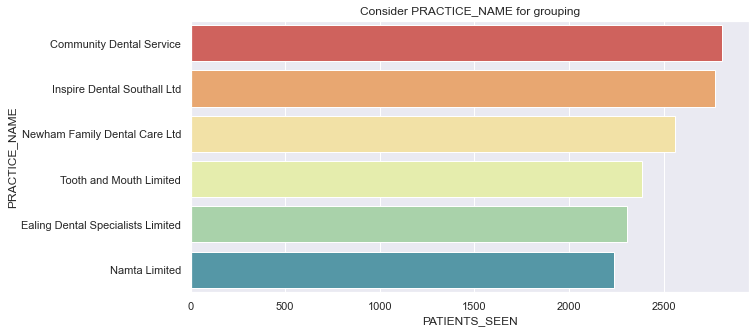

In [56]:
june_plot = june_children[june_children['REGION_NAME']=='London'].groupby('PRACTICE_CODE').aggregate({'PATIENTS_SEEN':'sum', 
                                        'PRACTICE_NAME':'first'}).sort_values(['PATIENTS_SEEN'], ascending = False)
#I combined all the actions together as they word in sequence.
#1. Filter London region
#2. Grouping PRACTICE CODE and using aggregation
#3. Sorting to get top 6 practices
sns.set(style="darkgrid")                   #choice of style
sns.barplot(x = 'PATIENTS_SEEN', y = 'PRACTICE_NAME', data = june_plot.head(6), 
                                         palette = 'Spectral').set_title('Consider PRACTICE_NAME for grouping')
plt.show()

#### Using PRACTICE_CODE and not PRACTICE_NAME?
> as PRACTICE_CODE is unique because it splits the data by Local Authorities as well. For example:- Whitecross Dental Care Limited has centers in all regions of the UK so it will not be right to consider all locations as one. Similarly, in London, it has 5 Local Authorities. Therefore, if we want to calculate the Number of Patients per practice per region, using PRACTICE_CODE will be more fitted for Analysis.

> I added some code to support my opinion that can be located below: 

In [33]:
Name_code_difference = junedata.groupby('PRACTICE_NAME').aggregate({'PRACTICE_CODE':lambda x: x.nunique()})
# using aggregate function along with lambda to get unique number of practices
Name_code_difference[Name_code_difference['PRACTICE_CODE']>1].tail()
#checks practices with more than 1 practice_code

,PRACTICE_CODE
PRACTICE_NAME,
Whitecross Dental Care Limited,142
Wirral Community NHS Trust,5
Woodhouse Dental Practice,2
Xeon Smiles UK Ltd,13
Yorkshire Smiles Limited,2


In [34]:
#Practice code for Whitecross Dental Care Limited in all regions
junedata[junedata['PRACTICE_NAME'] == 'Whitecross Dental Care Limited'].groupby('REGION_NAME').aggregate({'PRACTICE_CODE':lambda x: x.nunique()})

,PRACTICE_CODE
REGION_NAME,
East of England,5
London,5
Midlands,15
North East and Yorkshire,46
North West,22
South East,18
South West,31


### Q2. For the same time period ending on the 30th of June 2021, create a table that lists the following per region: (A) the number of unique practices, (B) the mean number of children seen per practice, and (C) the mean number of adults seen per practice. Discuss your findings. [15 marks].
---

#### Approach: 
The idea is to use `.groupby()` for grouping the variables by `REGION_NAME`. I will be using `.aggregate()` function of `.groupby()` object since it is good way to combine the variables and gives better functionality to handle the calculation within the DataFrame.

In [35]:
Num_practice_per_region = junedata.groupby('REGION_NAME').aggregate({'PRACTICE_CODE':lambda x: x.nunique()})

#### 2a. Unique number of practices

In [36]:
Num_practice_per_region

,PRACTICE_CODE
REGION_NAME,
East of England,759
London,1191
Midlands,1244
North East and Yorkshire,1023
North West,937
South East,1206
South West,667
Unallocated,25


> As we are asked to calculate the number of children/adults per practice. We can first calculate the total number of Patients(Children/Adults) seen in every region and try to divide the result by total number of practices in every region from the part (a). 

#### 2b. Mean number of children seen per practice

In [37]:
june_children = junedata[junedata.PATIENT_TYPE == 'Child']
Num_children = june_children.groupby('REGION_NAME').aggregate({'PRACTICE_CODE':lambda x: x.nunique(), 'PATIENTS_SEEN':np.sum})
#defining columns needed in aggragate function with the formula to calculate values

In [38]:
Num_children_per_region = Num_children.PATIENTS_SEEN/Num_practice_per_region.PRACTICE_CODE
#divide patient seen by practices
print(Num_children_per_region)

REGION_NAME
East of England             600.91
London                      487.01
Midlands                    591.64
North East and Yorkshire    582.63
North West                  541.15
South East                  556.64
South West                  579.27
Unallocated                 526.08
dtype: float64


#### 2c. mean number of adults seen per practice

In [39]:
june_adults = junedata[junedata.PATIENT_TYPE == 'Adult']
Num_adults = june_adults.groupby('REGION_NAME').aggregate({'PRACTICE_CODE':lambda x: x.nunique(), 'PATIENTS_SEEN':np.sum})
#similar steps as done in Children number

In [40]:
Num_adults_per_region = Num_adults.PATIENTS_SEEN.div(Num_practice_per_region.PRACTICE_CODE)
print(Num_adults_per_region)

REGION_NAME
East of England             2764.37
London                      2026.98
Midlands                    2804.70
North East and Yorkshire    3130.69
North West                  2670.05
South East                  2147.08
South West                  2773.91
Unallocated                 1821.68
dtype: float64


> Creating a combined table as mentioned in the question:

In [41]:
#creating the table by combining all the dataseries
Table = pd. concat([Num_adults_per_region, Num_children_per_region, Num_practice_per_region ], axis=1)
Table.columns = [ 'ADULTS', 'CHILDREN', 'PRACTICE_CODE']
Table

,ADULTS,CHILDREN,PRACTICE_CODE
REGION_NAME,,,
East of England,2764.37,600.91,759
London,2026.98,487.01,1191
Midlands,2804.70,591.64,1244
North East and Yorkshire,3130.69,582.63,1023
North West,2670.05,541.15,937
South East,2147.08,556.64,1206
South West,2773.91,579.27,667
Unallocated,1821.68,526.08,25


> For discussing the finding, I am plotting the Adult and children for every region using barplot so that we will be able to compare them using numbers we had got from our calculation.

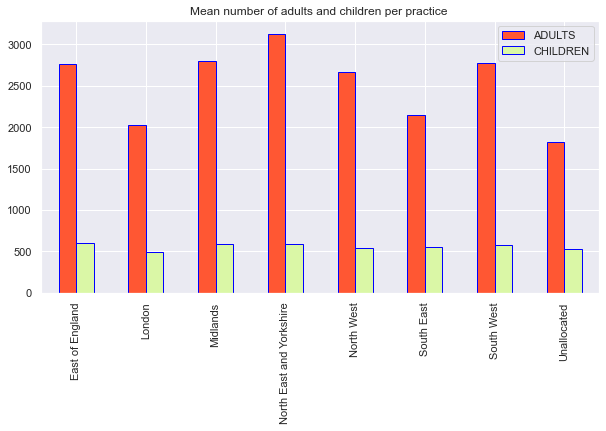

In [42]:
Table.reset_index(level = 0, inplace = True)

plt.rcParams['figure.figsize'] = [10, 5] # Produce bigger plots

my_colors = ["#FF5733", "#DAF7A6"]
Table.iloc[:,:3].plot.bar(rot = 90, color = my_colors, edgecolor = 'blue')         #iloc so that practice code is excluded
plt.title('Mean number of adults and children per practice ')
plt.xticks(ticks=Table.index, labels = Table['REGION_NAME'])
plt.show()

#### Discussion:
> As observed by the results, the number of adults visiting the dental clinics is significantly high as compared to children in every region. In North East Yorkshire, the mean number per practice is highest for Adults, and the number of children is highest in East of England. Surprisingly, London being a main city has the lowest mean number of visits per practice for both Adults and Children out of all the regions in England.

>I hypothesized that the number of children visiting the clinics is related to Adults since parents tend to bring their children for checkups when they visit. As a result, children may also get a checkup. However, based on the graph I plotted, this does not seem to strongly support it. I later calculated the percentages to review if there is a pattern that says these variables somewhere affect each other. Noticing the percentages for Children and Adults (except Unallocated regions), I conclude that the assumption can be true and they may have a weak association. 

In [43]:
Percentages = Table.copy()
Percentages['percetage_children'] = Percentages['CHILDREN']/Percentages['CHILDREN'].sum()*100  #calulate percentages
Percentages['percetage_adults'] = Percentages['ADULTS']/Percentages['ADULTS'].sum()*100
Percentages

,REGION_NAME,ADULTS,CHILDREN,PRACTICE_CODE,percetage_children,percetage_adults
0,East of England,2764.37,600.91,759,13.46,13.73
1,London,2026.98,487.01,1191,10.91,10.06
2,Midlands,2804.70,591.64,1244,13.25,13.93
3,North East and Yorkshire,3130.69,582.63,1023,13.05,15.55
4,North West,2670.05,541.15,937,12.12,13.26
5,South East,2147.08,556.64,1206,12.47,10.66
6,South West,2773.91,579.27,667,12.97,13.77
7,Unallocated,1821.68,526.08,25,11.78,9.05


### 3. Create a function that takes a practice code and a reporting period end date as inputs and creates a pie chart that shows the distribution of patients seen by age group [10 marks].
---

#### Approach: 
> The plan is to create a function as asked in the question and have some validation checks so we can verify if the parameters passed by the user are correct. I will be using Matplotlib for this task as I felt it was easier to modify and handle labeling. 

- I will be creating two arrays `Pract_check` and `Date_check` which are going to store the `PRACTICE_CODES` and `END_DATES` recorded by NHS. I tried handling this with regex but the values did not have a pattern except for dates.

- In some rows `Age == 0` which may be showing the newborn or children < 1 year. It does not appear right to have a young child in Dental Clinic. So, I have removed the count of patients with age zero.

In [44]:
#Preparing the unique list of validation checkers!
Pract_check = junedata.PRACTICE_CODE.unique()
Date_check = junedata.PSEEN_END_DATE.unique()

In [60]:
def piechart(practice_code, end_date):
    #condition check if practice_code and end_date are valid or not
    if practice_code in Pract_check and end_date in Date_check:   
    #since we are plotting patients by age, we will be trimming out these two variables
        plotting =  junedata.loc[(junedata.PRACTICE_CODE==practice_code) 
                                 & (junedata.PSEEN_END_DATE == end_date),['AGE_BAND','PATIENTS_SEEN']]
        #we had age = 0, which I removed from the plotting data
        draw = plotting[plotting.AGE_BAND != '0']
        da = draw.sort_values('AGE_BAND', ascending = False).groupby('AGE_BAND').sum()
        fig = plt.figure()
        ax = fig.add_axes([0,0,1.2,1.7]) 
        ax.axis('equal')
        explode = np.full(shape=len(da) , fill_value=0.18)             #intead of defining explode, I'm creating a numpy array
        my_data = da.PATIENTS_SEEN
        my_labels = da.index
        ax.pie(my_data,labels=my_labels, startangle=10 ,explode = explode, autopct='%1.1f%%', frame = True, 
               pctdistance = 1.1, labeldistance = 0.8, textprops={'fontsize': 8.5})
        #pctdistance and labeldistance are used to adjust the label positions
        #I have used textprops to adjust the font size in piechat as texts were overlapping
        plt.legend( loc="upper left",  bbox_to_anchor = (1,1))
        plt.title('Pie chart showing total patient visits by Age')
        plt.axis('equal')
        plt.show()
    #control will come to elif or else in case IF-condition is False
    elif practice_code not in Pract_check:
        return 'PLEASE ENTER VALID PRACTICE_CODE!'
    else:
        return 'PLEASE END VALID END_DATE!'

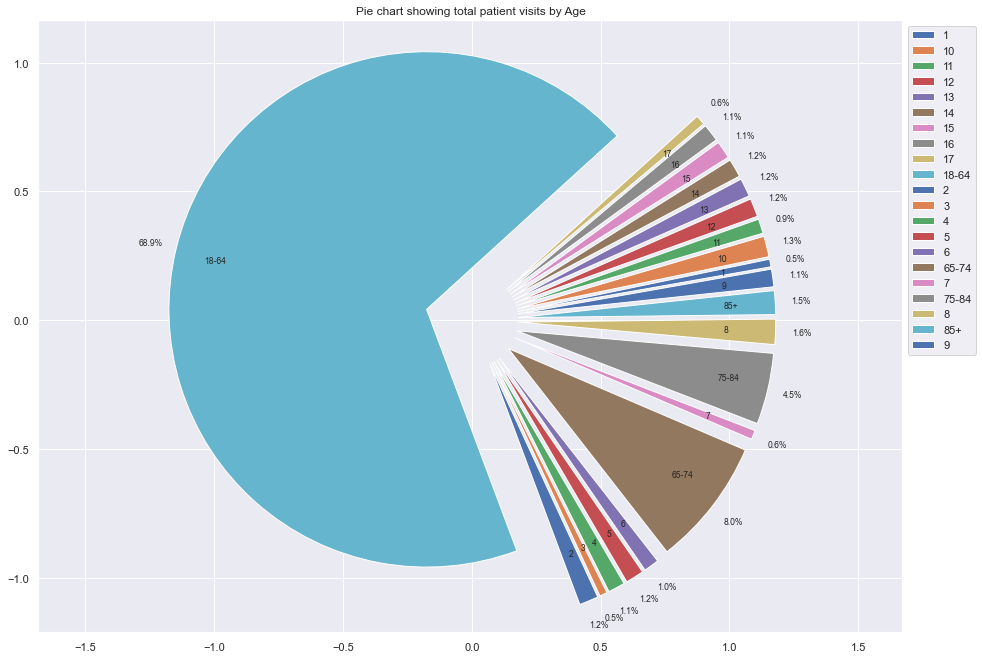

In [61]:
#Trying to check the function working
piechart('V98153','2021-06-30')

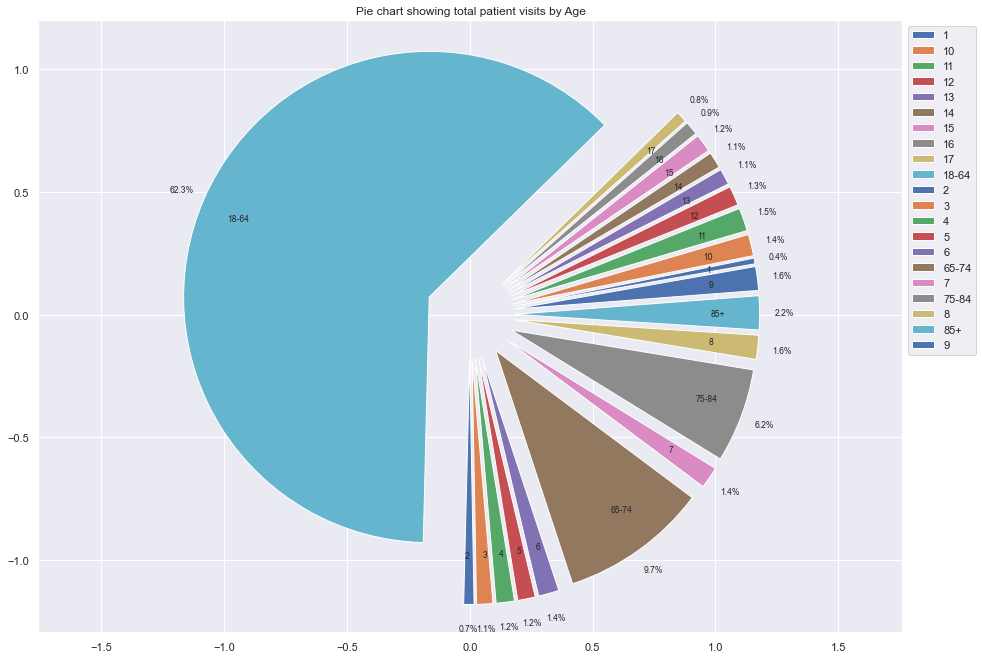

In [62]:
piechart('V97600', '2021-06-30')                  
#Another working example

### Q4.While most variables stay the same across the full reporting period, from January 2020 to end June 2021, there are some small differences in terms of the way the data is stored by the NHS. Create a loop that loads in all three data files, covering the full reporting period. The loop should combine all the files into a single pandas dataframe. You should take care of any differences between the files. Report the total numbers of (A) observations and (B) unique practice codes across all datasets [15 marks].
---

#### Approach:

>Since we are combining the datasets, I observed that `Jan-Jun 2020` data had one column named differently which was called `GEOTYPE` whereas in the other two datasets the field was called `GEOG_TYPE`. So, Instead of changing the column name for first data I initialized a DataFrame and concatenated all the CSV files without including the header. Afterwards, I named the column of final DataFrame.
```Python
    pd.concat([dental, df], ignore_index = True)
```

I designed a loop that traverses through all the files present in our Dataset folder. Finally, the combining of data files is done using `.concat()` function. By printing the Data shape with `.shape` every time the loop runs, we can look at how Dataset's been built.

In [48]:
path = 'Datasets-20211228/'                           #defining the folder's path
files = ['jan-jun-20', 'jul-dec-20', 'jan-jun-21']       #storing file names to loop through the folder
cols = ['PSEEN_END_DATE', 'GEOG_TYPE', 'PRACTICE_CODE', 'PRACTICE_NAME',
        'PRAC_POSTCODE', 'CCG_CODE', 'CCG_ONS_CODE', 'CCG_NAME', 'LA_CODE',   #defined columns for label
        'LA_NAME', 'REGION_CODE', 'REGION_ONS_CODE', 'REGION_NAME',
        'PATIENT_TYPE', 'AGE_BAND', 'PATIENTS_SEEN', 'POPULATION']
dental = pd.DataFrame()
for file in files:
    filename = path + 'nhs-dent-stat-eng-' + file + '-anx3-ps-prac.csv'
    df = pd.read_csv(filename , sep=',',index_col=False, header = None, skiprows = 1) #skiprows = 1 to not include headers to df
    dental = pd.concat([dental, df], ignore_index = True)
    print(dental.shape)
dental.columns = cols                              #mark columns

(951588, 17)
(1878603, 17)
(2799177, 17)


#### 4a. Number of observation = `2799177`

In [49]:
dental.shape[0]                #no. of observations

2799177

- Preprocessing:
> To work further on our data, we require to do some pre-processing and data cleaning. Therefore, we will be continuing with same steps that we followed earlier with `Jan-Jun2021` dataset.

In [50]:
dental.isnull().sum()

PSEEN_END_DATE           0
GEOG_TYPE                0
PRACTICE_CODE       106050
PRACTICE_NAME       106050
PRAC_POSTCODE       106050
CCG_CODE             59850
CCG_ONS_CODE         59850
CCG_NAME             59850
LA_CODE              46200
LA_NAME              46200
REGION_CODE          59850
REGION_ONS_CODE      59982
REGION_NAME          60246
PATIENT_TYPE             0
AGE_BAND                 0
PATIENTS_SEEN            0
POPULATION         2694381
dtype: int64

In [51]:
dental.drop('POPULATION', axis = 1, inplace = True)           #remove population column
dental.dropna(subset = ['PRACTICE_CODE'], inplace = True)     #deleting nan observations

> One more difference to notice is that the `Date-format` is different in datasets. Therefore, we will be reformatting the date using `.datetime()` function and have a generalized format.
```Python
        pd.to_datetime(dental['PSEEN_END_DATE']).dt.strftime('%Y-%m-%d')
```

In [52]:
dental['PSEEN_END_DATE'] = pd.to_datetime(dental['PSEEN_END_DATE']).dt.strftime('%Y-%m-%d')

#### 4b. Total number of  unique practice codes  = `7271`

In [53]:
dental.PRACTICE_CODE.nunique()

7271

### 5. Provide an analysis of the time-series of the total number of adult patients seen across the full period in London. Visualise and discuss your results, including a discussion of how the COVID-19 variables from PHE relate to the number of patients seen at the London dentistry clinics [15 marks].
***

#### Approach:
We are going to extract Adult patients in London data from the main dataset as we did in previous tasks and plot a time-series graph to look at the pattern between covid 19 and Dental Clinics.

In [54]:
Adults = dental[(dental.PATIENT_TYPE == 'Adult') & (dental.REGION_NAME == 'London')]
Dental_adults = Adults.groupby('PSEEN_END_DATE', as_index=False).sum()

Text(0.5, 0, 'Time')

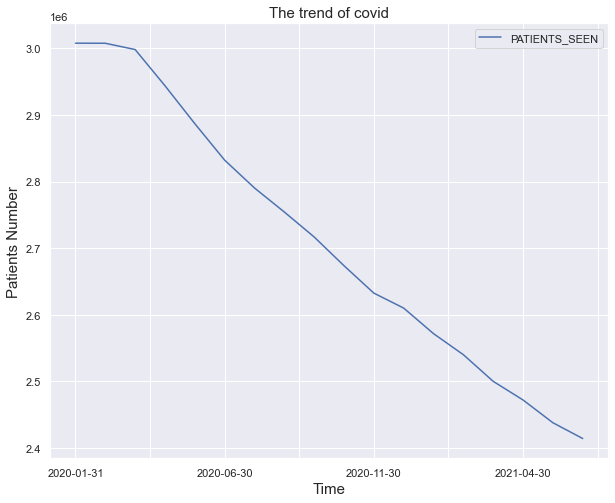

In [55]:
fig_au = Dental_adults.iloc[:,:2].plot(x='PSEEN_END_DATE', figsize=(10,8))
fig_au.set_title('The trend of covid',fontsize=15)
fig_au.set_ylabel('Patients Number',fontsize=15)
fig_au.set_xlabel('Time',fontsize=15)

#### Discussion:
> - As shown in the graph, the number of Patients seen linearly (almost) decreased throughout the year starting from the First Lockdown period which was around the end of March 2020. It occurs that the covid situation has affected the dental practice as the government restricted the availability of Dental treatment during the national lockdown. However, all the practices were started to resume after the relaxation in the first lockdown which happen in June 2020, but it appears that it has not changed the negative elevation of the curve.

>- I suggest that social distancing might be one of the causes that were not allowing patients to have regular dental checkups and treatments because the dental clinics were not closed in 2nd and 3rd Lockdowns. Moreover, It is unexpected to see that even after one year i.e., June 2021, there is no acceleration in the number of patients visiting dental clinics.

>- No doubt, this is noticeable that dental services have been majorly affected by the covid-19 outbreak since the beginning and there seems to be no chance of recovery until June 2021.

A research supporting decline in dental clinic visits can be found below:
>- "A survey of 450 dentists by the Faculty of Dental Surgery at the Royal College of Surgeons found that most members (93%) had been seeing ten patients or fewer per session since the resumption of services. This compared to 46% who saw more than 10 patients per session pre-pandemic. It also found that around a third (34%) of respondents did not know when they would fully resume services, with a further 36% saying they did not expect to resume full pre-pandemic services until 2021" (resource = [link]('https://lordslibrary.parliament.uk/covid-19-and-dental-services/'))


##### Thank you!